In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Discrete Random Variable with finite number of values
- PMF

| **X**        | $x_1$   | $x_2$   | ...   | $x_n$ |
|--------------|-----|-----|-----|-----|
| **P(X = x)** | $p_1$ | $p_2$ | ... | $p_n$ |

In [2]:
class RandomVariable():
    def __init__(self, X:[], p:[]):
        assert len(X) == len(p)

        # assert sum(p) = 1.0 and p_i >= 0
        sum_p = 0
        for p_i in p:
            assert p_i >= 0
            sum_p += p_i
        assert abs(sum_p - 1.0) <= 1e-6

        # Init
        self.X = X
        self.p = p
        

    def get_mean(self):
        E_X = 0
        for x_i, p_i in zip(self.X, self.p):
            E_X += (x_i*p_i)
        return E_X


    def get_variance(self):
        # Get E(X)
        E_X = self.get_mean()

        # Get (X - E(X))^2
        sqr_dist = [ (x_i - E_X)**2 for x_i in self.X ]

        # Get Var(X) = E[ (X-E(X)^2 ]
        Var_X = 0
        for sqr_d, p_i in zip(sqr_dist, self.p):
            Var_X += (sqr_d*p_i)
        return Var_X

#### Example 1

PMF:

| **X**        | 1   | 2   | 4   |
|--------------|-----|-----|-----|
| **P(X = x)** | 0.2 | 0.5 | 0.3 |

In [3]:
exp = RandomVariable(X=[1,2,4], p=[0.2, 0.5, 0.3])

print(f'''
E(X) = {exp.get_mean():.3f}
Var(X) = {exp.get_variance():.3f}
''')


E(X) = 2.400
Var(X) = 1.240



#### Example 2
PMF:

| **X**        | 5   | -1   |
|--------------|-----|-----|
| **P(X = x)** | 0.1 | 0.9 | 

In [4]:
exp = RandomVariable(X=[5,-1], p=[0.1, 0.9])

print(f'''
E(X) = {exp.get_mean():.3f}
Var(X) = {exp.get_variance():.3f}
''')


E(X) = -0.400
Var(X) = 3.240



#### Example 3
PMF:

| **X**        | -3   | -2  | -1  | 0   | 1   | 2 | 3    |
|--------------|------|-----|-----|-----|-----|---|------|
| **P(X = x)** | 1/14 | 1/7 | 1/7 | 2/7 | 2/7 | 0 | 1/14 |

In [5]:
exp = RandomVariable(X=[-3,-2,-1,0,1,2,3], p=[1/14, 1/7, 1/7, 2/7, 2/7, 0, 1/14])

print(f'''
E(X) = {exp.get_mean():.3f}
Var(X) = {exp.get_variance():.3f}
''')


E(X) = -0.143
Var(X) = 2.265



# 2. Discrete Random Variable with finite number of values - Simulation

- PMF

| **X**        | $x_1$   | $x_2$   | ...   | $x_n$ |
|--------------|-----|-----|-----|-----|
| **P(X = x)** | $p_1$ | $p_2$ | ... | $p_n$ |

#### Example

| **X**        | 1   | 2   | 4   |
|--------------|-----|-----|-----|
| **P(X = x)** | 0.2 | 0.5 | 0.3 |

In [6]:
def normalize_freq(counter:dict):
    len_data = 0
    for k,v in counter.items():
        len_data += v
    
    res = {}
    for k,v in counter.items():
        res[k] = v/len_data
    return res

In [7]:
from numpy.random import choice
from collections import Counter

n = 10000

# Do n times
samples = [ choice(a=[1,2,4], p=[0.2,0.5,0.3]) for _ in range(n) ]
print(samples[:5])

# Count frequency
freq = Counter(samples)
print(freq)

# Normalized frequency (sum(p) = 1)
norm_freq = normalize_freq(freq)
print(norm_freq)

[1, 2, 2, 2, 4]
Counter({2: 4958, 4: 3120, 1: 1922})
{1: 0.1922, 2: 0.4958, 4: 0.312}


# 3. Binomial distribution
- PMF

$P(X=k) =  C_k^n p^k(1-p)^{n-k}$, $\forall k \in [0,n]$, $k\in N$


#### By numpy.random.binomial - Simulation

In [8]:
from numpy.random import binomial

samples = binomial(n=10, p=0.3, size=10000)

# Count frequency
freq = Counter(samples)
print(freq)

# Normalized frequency (sum(p) = 1)
norm_freq = normalize_freq(freq)
print(norm_freq)

Counter({3: 2632, 2: 2389, 4: 1999, 1: 1183, 5: 1038, 6: 366, 0: 288, 7: 82, 8: 19, 9: 4})
{6: 0.0366, 5: 0.1038, 4: 0.1999, 3: 0.2632, 2: 0.2389, 1: 0.1183, 0: 0.0288, 7: 0.0082, 9: 0.0004, 8: 0.0019}


#### By scipy.stats.binom

In [9]:
from scipy.stats import binom

X = binom(n=10, p=0.3)

# Get P(X=1)
print(X.pmf(1))

# Get P(X=1.5)
print(X.pmf(1.5))

0.12106082100000018
0.0


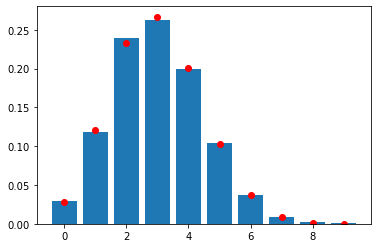

In [10]:
# Plot pmf from scipy.stats.binom - dot
x = np.arange(0,10,1)
y = X.pmf(x)
plt.plot(x, y, 'or');

# Plot freqency simulation by numpy.random.binomial - bar
plt.bar(x=list(norm_freq.keys()), height=list(norm_freq.values()));